In [3]:
import pandas as pd
import numpy as np
import psycopg2
import pathlib as Path
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [4]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [5]:
# Note - You must set up your own config file
from config import db_password

In [6]:
# Name the SQL database your are accessing
database = "RealLeads"

# Make your local connection to the database in PostgreSQL
conn = psycopg2.connect(
    host="localhost",
    database=database,
    user="postgres",
    password=db_password)

In [7]:
# Table selection Function
def table_select(table_name):
    table =f"select * from \"{table_name}\""
    dataFrame = pd.read_sql(table, conn)
    return dataFrame

In [8]:
# Names of the tables to be imported
prop_charac = table_select("prop_charac_clean")
pub_rec = table_select("pub_rec_clean")
sales_data = table_select("sales_data_clean")

In [9]:
prop_charac.head()

,MLSNumber,Address,BuildingName,Ownership,Senior_Community_YN,Condo/Coop_Assoc_YN,HOA_YN,AssociationFee,AssociationFeeFrequency,Structure_Type,...,Garage_YN,GarageSpaces,GarageFeatures,Parking,ExteriorFeatures,ExteriorMaterial,Main_Roof,Foundation,PorchDeck,SwimmingPoolType
0,DENC518086,2615 Pecksniff Rd,NONE AVAILABLE,FeeSimple,No,No,Yes,$15,Annually,Detached,...,Yes,1.0,None,None,"ExtensiveHardscape,Sidewalks,StoneRetainingWal...","BrickFront,VinylSiding",ArchitecturalShingle,None,"Patios,Porches",None
1,DENC518982,4938 S Tupelo Turn,None,FeeSimple,No,No,No,None,None,Interior Row/Townhouse,...,No,NaN,None,None,None,"AluminumSiding,Brick,VinylSiding",Asphalt,None,None,None
2,DENC512992,15 Kristina Ct,None,FeeSimple,No,No,No,None,None,Interior Row/Townhouse,...,No,NaN,None,None,None,VinylSiding,None,None,None,None
3,DENC512104,3251 Champions Dr,None,FeeSimple,No,No,Yes,$50,Annually,Interior Row/Townhouse,...,Yes,1.0,None,None,None,Other,Shingle,None,Patios,None
4,DENC503480,3706 Lafayette St,None,FeeSimple,No,No,No,None,None,Detached,...,No,NaN,None,None,None,Asbestos,None,None,None,None


In [10]:
prop_charac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 59 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MLSNumber                  5576 non-null   object 
 1   Address                    5576 non-null   object 
 2   BuildingName               1139 non-null   object 
 3   Ownership                  5576 non-null   object 
 4   Senior_Community_YN        5576 non-null   object 
 5   Condo/Coop_Assoc_YN        5576 non-null   object 
 6   HOA_YN                     5576 non-null   object 
 7   AssociationFee             1582 non-null   object 
 8   AssociationFeeFrequency    1582 non-null   object 
 9   Structure_Type             5576 non-null   object 
 10  Acres                      5354 non-null   float64
 11  LotDimensions              4847 non-null   object 
 12  LotDescription             1455 non-null   object 
 13  FeeIncludes                661 non-null    objec

In [11]:
pub_rec.head()

,MLSNumber,Tax_ID,Address-truncated,PropertyCityState,Zip_Code,Zip4,CarrierRoute,PropDoNotMail,OwnerNames,OwnerLastName,...,BldgSqFtTotal,Stories,Bedrooms,Exterior,BsmtDesc,FireplaceTotal,GrgType,HeatDelivery,YearBuilt,YearRemod
0,DENC518086,08-038.30-119,2615 Pecksniff,"Wilmington, DE",19808,3026,C010,N,James Robinson,Robinson,...,1875.0,1.0,3.0,"Brick, Aluminum, Vinyl",Finished,0.0,Att/BuiltIn/Bsmt,Hot Water/Steam,1958,0
1,DENC518982,08-036.10-081,4938 S Tupelo,"Wilmington, DE",19808,1026,C009,N,Xiaopeng Deng,Deng,...,1575.0,2.0,3.0,"Brick, Aluminum, Vinyl",Finished,0.0,None,Hot/Warm Air,1976,0
2,DENC512992,08-044.30-363,15 Kristina,"Wilmington, DE",19808,4063,C084,N,Robert F Walls,Walls,...,NaN,2.0,2.0,"Aluminum, Vinyl",None,0.0,None,Heat Pump,1985,0
3,DENC512104,08-036.40-376,3251 Champions,"Wilmington, DE",19808,2601,C039,N,Michael J Downs,Downs,...,NaN,2.0,2.0,Other,None,1.0,Att/BuiltIn/Bsmt,Heat Pump,1985,0
4,DENC503480,07-041.10-071,3706 Lafayette,"Wilmington, DE",19808,6014,C001,N,Maria Corona,Corona,...,NaN,1.0,3.0,Asbestos,None,0.0,None,Hot/Warm Air,1957,0


In [12]:
pub_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MLSNumber                5576 non-null   object 
 1   Tax_ID                   5576 non-null   object 
 2   Address-truncated        5576 non-null   object 
 3   PropertyCityState        5576 non-null   object 
 4   Zip_Code                 5576 non-null   object 
 5   Zip4                     5576 non-null   object 
 6   CarrierRoute             5572 non-null   object 
 7   PropDoNotMail            5573 non-null   object 
 8   OwnerNames               5246 non-null   object 
 9   OwnerLastName            5206 non-null   object 
 10  OwnerFirstName           4917 non-null   object 
 11  Owner2LastName           2359 non-null   object 
 12  Owner2FirstName          2359 non-null   object 
 13  Owner3LastName           89 non-null     object 
 14  Owner3FirstName         

In [13]:
sales_data.head()

,MLSNumber,Address,Status,Sold_Price,Sold_Price_less_Concession,Orig_List_Price,Current_List_Price,Days_on_Market,Previous_Days_on_Market,ListDate,StatusDate,Agreement_of_Sale_Date,SettledDate,Concessions_YN,Concessions_Remarks,SellerConcessionsAmount,FinalFinancing
0,DENC518086,2615 Pecksniff Rd,Closed,335000.0,335000.0,330000.0,330000.0,5.0,5.0,2020-12-11,2021-02-11,2020-12-16,2021-02-11,No,None,0.0,FHA
1,DENC518982,4938 S Tupelo Turn,Closed,200000.0,200000.0,215500.0,210000.0,47.0,67.0,2021-01-07,2021-04-08,2021-02-21,2021-04-08,No,None,0.0,Conventional
2,DENC512992,15 Kristina Ct,Closed,200000.0,200000.0,200000.0,200000.0,15.0,15.0,2020-12-28,2021-02-26,2021-01-09,2021-02-26,No,None,0.0,Conventional
3,DENC512104,3251 Champions Dr,Closed,200000.0,200000.0,219900.0,214900.0,11.0,11.0,2020-10-27,2020-12-14,2020-11-05,2020-12-11,No,None,0.0,Conventional
4,DENC503480,3706 Lafayette St,Closed,200000.0,200000.0,190000.0,190000.0,3.0,3.0,2020-06-20,2020-08-02,2020-06-21,2020-07-31,No,None,0.0,Conventional


In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5576 entries, 0 to 5575
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MLSNumber                   5576 non-null   object 
 1   Address                     5576 non-null   object 
 2   Status                      5576 non-null   object 
 3   Sold_Price                  5576 non-null   float64
 4   Sold_Price_less_Concession  5576 non-null   float64
 5   Orig_List_Price             5576 non-null   float64
 6   Current_List_Price          5576 non-null   float64
 7   Days_on_Market              5576 non-null   float64
 8   Previous_Days_on_Market     5576 non-null   float64
 9   ListDate                    5576 non-null   object 
 10  StatusDate                  5576 non-null   object 
 11  Agreement_of_Sale_Date      5576 non-null   object 
 12  SettledDate                 5576 non-null   object 
 13  Concessions_YN              5576 

In [15]:
# Drop Rows from prop_charac
prop_charac = prop_charac[['MLSNumber',
                            'Bedrooms',
                            'Baths',
                            'Basement_YN',
                            'Garage_YN',
                            'AboveGradeSqFt',
                            'BelowGradeSqFt',
                            'Condo/Coop_Assoc_YN',
                            'Central_Air_YN',
                            'HOA_YN',
                            'Age',
                          'Ownership',
                          'Structure_Type',
                          'InteriorSqFt',
                          'NumberofStories']]

prop_charac

,MLSNumber,Bedrooms,Baths,Basement_YN,Garage_YN,AboveGradeSqFt,BelowGradeSqFt,Condo/Coop_Assoc_YN,Central_Air_YN,HOA_YN,Age,Ownership,Structure_Type,InteriorSqFt,NumberofStories
0,DENC518086,4.0,2.0,Yes,Yes,2099.0,0.0,No,Yes,Yes,1958.0,FeeSimple,Detached,2099.0,"Main,Upper1"
1,DENC518982,3.0,2.0,Yes,No,1575.0,352.0,No,Yes,No,1976.0,FeeSimple,Interior Row/Townhouse,1927.0,"Main,Upper1"
2,DENC512992,2.0,2.0,Yes,No,1150.0,0.0,No,Yes,No,1985.0,FeeSimple,Interior Row/Townhouse,1150.0,"Main,Upper1"
3,DENC512104,2.0,3.0,Yes,Yes,1425.0,0.0,No,Yes,Yes,1985.0,FeeSimple,Interior Row/Townhouse,1425.0,"Main,Upper1"
4,DENC503480,3.0,2.0,Yes,No,925.0,0.0,No,Yes,No,1957.0,FeeSimple,Detached,925.0,Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,DENC520114,3.0,2.0,Yes,Yes,3045.0,0.0,No,Yes,Yes,1958.0,FeeSimple,Detached,3045.0,"Lower1,Main"
5572,DENC520392,4.0,4.0,Yes,Yes,3175.0,636.0,No,Yes,Yes,1973.0,FeeSimple,Detached,3811.0,"Lower1,Main,Upper1"
5573,DENC2014038,4.0,3.0,Yes,Yes,2850.0,341.0,No,Yes,No,1989.0,FeeSimple,Detached,3191.0,"Lower1,Main,Upper1"
5574,DENC2005484,4.0,3.0,Yes,Yes,3425.0,0.0,No,Yes,No,1992.0,FeeSimple,Detached,3425.0,"Lower1,Main,Upper1"


In [16]:
# Drop Rows from pub_rec
pub_rec = pub_rec[['MLSNumber',
                    'Zip_Code',
                    'SchoolDistrict',
                    'AnnualTax',
                    'LotAcres',
                    'SubdivisionNeighborhood',
                    'Municipality',
                      'Lot',
                      'OwnerOccupied',
                      'TotalLandAsmt',
                  'TotalBldgAsmt',
                  'PropertyClass',
                  'YearBuilt']]

pub_rec

,MLSNumber,Zip_Code,SchoolDistrict,AnnualTax,LotAcres,SubdivisionNeighborhood,Municipality,Lot,OwnerOccupied,TotalLandAsmt,TotalBldgAsmt,PropertyClass,YearBuilt
0,DENC518086,19808,Red Clay Consolidated,2151,0.26,Sherwood Park Ii,Mill Creek Hundred,119,True,12600,52600,Residential,1958
1,DENC518982,19808,Red Clay Consolidated,1824,0.06,Pepper Ridge,Mill Creek Hundred,81,False,9900,45400,Residential,1976
2,DENC512992,19808,Red Clay Consolidated,1563,0.05,Woodmill,Mill Creek Hundred,363,False,9400,38000,Residential,1985
3,DENC512104,19808,Red Clay Consolidated,2174,0.05,Fairway Falls,Mill Creek Hundred,376,True,8600,57300,Residential,1985
4,DENC503480,19808,Red Clay Consolidated,1349,0.17,Washington Hgts,Christiana Hundred,71,True,8600,32300,Residential,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,DENC520114,19707,Red Clay Consolidated,4311,1.03,Canterbury Hills,Mill Creek Hundred,46,True,31300,99400,Residential,1958
5572,DENC520392,19707,Red Clay Consolidated,5208,0.75,None,Christiana Hundred,54,True,25200,132700,Residential,1973
5573,DENC2014038,19707,Red Clay Consolidated,4407,0.39,Stenning Woods,Mill Creek Hundred,27,True,30000,103600,Residential,1989
5574,DENC2005484,19707,Red Clay Consolidated,4825,0.54,Quaker Lea Villas,Mill Creek Hundred,16,True,28500,117800,Residential,1992


In [17]:
# Drop Rows from sales_data

sales_data = sales_data[['MLSNumber',
                        'Days_on_Market',
                        'Orig_List_Price']]

sales_data

,MLSNumber,Days_on_Market,Orig_List_Price
0,DENC518086,5.0,330000.0
1,DENC518982,47.0,215500.0
2,DENC512992,15.0,200000.0
3,DENC512104,11.0,219900.0
4,DENC503480,3.0,190000.0
...,...,...,...
5571,DENC520114,5.0,595000.0
5572,DENC520392,25.0,639000.0
5573,DENC2014038,7.0,529900.0
5574,DENC2005484,25.0,620000.0


In [18]:
# Merge sales_data and pub_rec dataframes
merge_df = pd.merge(sales_data, pub_rec, on='MLSNumber')
merge_df

,MLSNumber,Days_on_Market,Orig_List_Price,Zip_Code,SchoolDistrict,AnnualTax,LotAcres,SubdivisionNeighborhood,Municipality,Lot,OwnerOccupied,TotalLandAsmt,TotalBldgAsmt,PropertyClass,YearBuilt
0,DENC518086,5.0,330000.0,19808,Red Clay Consolidated,2151,0.26,Sherwood Park Ii,Mill Creek Hundred,119,True,12600,52600,Residential,1958
1,DENC518982,47.0,215500.0,19808,Red Clay Consolidated,1824,0.06,Pepper Ridge,Mill Creek Hundred,81,False,9900,45400,Residential,1976
2,DENC512992,15.0,200000.0,19808,Red Clay Consolidated,1563,0.05,Woodmill,Mill Creek Hundred,363,False,9400,38000,Residential,1985
3,DENC512104,11.0,219900.0,19808,Red Clay Consolidated,2174,0.05,Fairway Falls,Mill Creek Hundred,376,True,8600,57300,Residential,1985
4,DENC503480,3.0,190000.0,19808,Red Clay Consolidated,1349,0.17,Washington Hgts,Christiana Hundred,71,True,8600,32300,Residential,1957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,DENC520114,5.0,595000.0,19707,Red Clay Consolidated,4311,1.03,Canterbury Hills,Mill Creek Hundred,46,True,31300,99400,Residential,1958
5572,DENC520392,25.0,639000.0,19707,Red Clay Consolidated,5208,0.75,None,Christiana Hundred,54,True,25200,132700,Residential,1973
5573,DENC2014038,7.0,529900.0,19707,Red Clay Consolidated,4407,0.39,Stenning Woods,Mill Creek Hundred,27,True,30000,103600,Residential,1989
5574,DENC2005484,25.0,620000.0,19707,Red Clay Consolidated,4825,0.54,Quaker Lea Villas,Mill Creek Hundred,16,True,28500,117800,Residential,1992


In [19]:
# Merge merge_df and prop_charac dataframes
merge_df = pd.merge(merge_df, prop_charac, on='MLSNumber')
merge_df

,MLSNumber,Days_on_Market,Orig_List_Price,Zip_Code,SchoolDistrict,AnnualTax,LotAcres,SubdivisionNeighborhood,Municipality,Lot,...,AboveGradeSqFt,BelowGradeSqFt,Condo/Coop_Assoc_YN,Central_Air_YN,HOA_YN,Age,Ownership,Structure_Type,InteriorSqFt,NumberofStories
0,DENC518086,5.0,330000.0,19808,Red Clay Consolidated,2151,0.26,Sherwood Park Ii,Mill Creek Hundred,119,...,2099.0,0.0,No,Yes,Yes,1958.0,FeeSimple,Detached,2099.0,"Main,Upper1"
1,DENC518982,47.0,215500.0,19808,Red Clay Consolidated,1824,0.06,Pepper Ridge,Mill Creek Hundred,81,...,1575.0,352.0,No,Yes,No,1976.0,FeeSimple,Interior Row/Townhouse,1927.0,"Main,Upper1"
2,DENC512992,15.0,200000.0,19808,Red Clay Consolidated,1563,0.05,Woodmill,Mill Creek Hundred,363,...,1150.0,0.0,No,Yes,No,1985.0,FeeSimple,Interior Row/Townhouse,1150.0,"Main,Upper1"
3,DENC512104,11.0,219900.0,19808,Red Clay Consolidated,2174,0.05,Fairway Falls,Mill Creek Hundred,376,...,1425.0,0.0,No,Yes,Yes,1985.0,FeeSimple,Interior Row/Townhouse,1425.0,"Main,Upper1"
4,DENC503480,3.0,190000.0,19808,Red Clay Consolidated,1349,0.17,Washington Hgts,Christiana Hundred,71,...,925.0,0.0,No,Yes,No,1957.0,FeeSimple,Detached,925.0,Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5571,DENC520114,5.0,595000.0,19707,Red Clay Consolidated,4311,1.03,Canterbury Hills,Mill Creek Hundred,46,...,3045.0,0.0,No,Yes,Yes,1958.0,FeeSimple,Detached,3045.0,"Lower1,Main"
5572,DENC520392,25.0,639000.0,19707,Red Clay Consolidated,5208,0.75,None,Christiana Hundred,54,...,3175.0,636.0,No,Yes,Yes,1973.0,FeeSimple,Detached,3811.0,"Lower1,Main,Upper1"
5573,DENC2014038,7.0,529900.0,19707,Red Clay Consolidated,4407,0.39,Stenning Woods,Mill Creek Hundred,27,...,2850.0,341.0,No,Yes,No,1989.0,FeeSimple,Detached,3191.0,"Lower1,Main,Upper1"
5574,DENC2005484,25.0,620000.0,19707,Red Clay Consolidated,4825,0.54,Quaker Lea Villas,Mill Creek Hundred,16,...,3425.0,0.0,No,Yes,No,1992.0,FeeSimple,Detached,3425.0,"Lower1,Main,Upper1"


In [20]:
# Info for all columns in new dataframe
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5576 entries, 0 to 5575
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MLSNumber                5576 non-null   object 
 1   Days_on_Market           5576 non-null   float64
 2   Orig_List_Price          5576 non-null   float64
 3   Zip_Code                 5576 non-null   object 
 4   SchoolDistrict           5576 non-null   object 
 5   AnnualTax                5576 non-null   int64  
 6   LotAcres                 5576 non-null   float64
 7   SubdivisionNeighborhood  5288 non-null   object 
 8   Municipality             5576 non-null   object 
 9   Lot                      5576 non-null   object 
 10  OwnerOccupied            5576 non-null   bool   
 11  TotalLandAsmt            5576 non-null   int64  
 12  TotalBldgAsmt            5576 non-null   int64  
 13  PropertyClass            5576 non-null   object 
 14  YearBuilt               

In [21]:
# Change index to MLSNumber
merge_df = merge_df.set_index('MLSNumber')
merge_df

,Days_on_Market,Orig_List_Price,Zip_Code,SchoolDistrict,AnnualTax,LotAcres,SubdivisionNeighborhood,Municipality,Lot,OwnerOccupied,...,AboveGradeSqFt,BelowGradeSqFt,Condo/Coop_Assoc_YN,Central_Air_YN,HOA_YN,Age,Ownership,Structure_Type,InteriorSqFt,NumberofStories
MLSNumber,,,,,,,,,,,,,,,,,,,,,
DENC518086,5.0,330000.0,19808,Red Clay Consolidated,2151,0.26,Sherwood Park Ii,Mill Creek Hundred,119,True,...,2099.0,0.0,No,Yes,Yes,1958.0,FeeSimple,Detached,2099.0,"Main,Upper1"
DENC518982,47.0,215500.0,19808,Red Clay Consolidated,1824,0.06,Pepper Ridge,Mill Creek Hundred,81,False,...,1575.0,352.0,No,Yes,No,1976.0,FeeSimple,Interior Row/Townhouse,1927.0,"Main,Upper1"
DENC512992,15.0,200000.0,19808,Red Clay Consolidated,1563,0.05,Woodmill,Mill Creek Hundred,363,False,...,1150.0,0.0,No,Yes,No,1985.0,FeeSimple,Interior Row/Townhouse,1150.0,"Main,Upper1"
DENC512104,11.0,219900.0,19808,Red Clay Consolidated,2174,0.05,Fairway Falls,Mill Creek Hundred,376,True,...,1425.0,0.0,No,Yes,Yes,1985.0,FeeSimple,Interior Row/Townhouse,1425.0,"Main,Upper1"
DENC503480,3.0,190000.0,19808,Red Clay Consolidated,1349,0.17,Washington Hgts,Christiana Hundred,71,True,...,925.0,0.0,No,Yes,No,1957.0,FeeSimple,Detached,925.0,Main
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DENC520114,5.0,595000.0,19707,Red Clay Consolidated,4311,1.03,Canterbury Hills,Mill Creek Hundred,46,True,...,3045.0,0.0,No,Yes,Yes,1958.0,FeeSimple,Detached,3045.0,"Lower1,Main"
DENC520392,25.0,639000.0,19707,Red Clay Consolidated,5208,0.75,None,Christiana Hundred,54,True,...,3175.0,636.0,No,Yes,Yes,1973.0,FeeSimple,Detached,3811.0,"Lower1,Main,Upper1"
DENC2014038,7.0,529900.0,19707,Red Clay Consolidated,4407,0.39,Stenning Woods,Mill Creek Hundred,27,True,...,2850.0,341.0,No,Yes,No,1989.0,FeeSimple,Detached,3191.0,"Lower1,Main,Upper1"


In [22]:
# Change object columns to category
for label, content in merge_df.items():
    if pd.api.types.is_string_dtype(content):
        merge_df[label] = content.astype("category").cat.as_ordered()
        
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5576 entries, DENC518086 to DENC526982
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Days_on_Market           5576 non-null   float64 
 1   Orig_List_Price          5576 non-null   float64 
 2   Zip_Code                 5576 non-null   category
 3   SchoolDistrict           5576 non-null   category
 4   AnnualTax                5576 non-null   int64   
 5   LotAcres                 5576 non-null   float64 
 6   SubdivisionNeighborhood  5288 non-null   category
 7   Municipality             5576 non-null   category
 8   Lot                      5576 non-null   category
 9   OwnerOccupied            5576 non-null   bool    
 10  TotalLandAsmt            5576 non-null   int64   
 11  TotalBldgAsmt            5576 non-null   int64   
 12  PropertyClass            5576 non-null   category
 13  YearBuilt                5576 non-null   category
 14

In [23]:
# Change categories to numbers
for label,content in merge_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        merge_df[label] = pd.Categorical(content).codes+1

In [24]:
# Determine the number of unique values in each column.
merge_df.nunique()

Days_on_Market              200
Orig_List_Price             618
Zip_Code                     15
SchoolDistrict                4
AnnualTax                  2540
LotAcres                    173
SubdivisionNeighborhood     620
Municipality                 12
Lot                         844
OwnerOccupied                 2
TotalLandAsmt               376
TotalBldgAsmt              1139
PropertyClass                 4
YearBuilt                   154
Bedrooms                      9
Baths                         7
Basement_YN                   2
Garage_YN                     2
AboveGradeSqFt              478
BelowGradeSqFt              611
Condo/Coop_Assoc_YN           2
Central_Air_YN                2
HOA_YN                        2
Age                         166
Ownership                     4
Structure_Type                9
InteriorSqFt               1133
NumberofStories              36
dtype: int64

In [25]:
# Find null rows
merge_df.isna().sum()

Days_on_Market               0
Orig_List_Price              0
Zip_Code                     0
SchoolDistrict               0
AnnualTax                    0
LotAcres                     0
SubdivisionNeighborhood      0
Municipality                 0
Lot                          0
OwnerOccupied                0
TotalLandAsmt                0
TotalBldgAsmt                0
PropertyClass                0
YearBuilt                    0
Bedrooms                     5
Baths                        5
Basement_YN                  0
Garage_YN                    0
AboveGradeSqFt               0
BelowGradeSqFt             182
Condo/Coop_Assoc_YN          0
Central_Air_YN               0
HOA_YN                       0
Age                          0
Ownership                    0
Structure_Type               0
InteriorSqFt                 0
NumberofStories              0
dtype: int64

In [26]:
# Drop rows with null values
clean_df = merge_df.dropna()
clean_df

,Days_on_Market,Orig_List_Price,Zip_Code,SchoolDistrict,AnnualTax,LotAcres,SubdivisionNeighborhood,Municipality,Lot,OwnerOccupied,...,AboveGradeSqFt,BelowGradeSqFt,Condo/Coop_Assoc_YN,Central_Air_YN,HOA_YN,Age,Ownership,Structure_Type,InteriorSqFt,NumberofStories
MLSNumber,,,,,,,,,,,,,,,,,,,,,
DENC518086,5.0,330000.0,15,4,2151,0.26,449,4,293,True,...,2099.0,0.0,1,2,2,1958.0,3,1,2099.0,27
DENC518982,47.0,215500.0,15,4,1824,0.06,388,4,825,False,...,1575.0,352.0,1,2,1,1976.0,3,4,1927.0,27
DENC512992,15.0,200000.0,15,4,1563,0.05,610,4,592,False,...,1150.0,0.0,1,2,1,1985.0,3,4,1150.0,27
DENC512104,11.0,219900.0,15,4,2174,0.05,185,4,606,True,...,1425.0,0.0,1,2,2,1985.0,3,4,1425.0,27
DENC503480,3.0,190000.0,15,4,1349,0.17,535,2,813,True,...,925.0,0.0,1,2,1,1957.0,3,1,925.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DENC520114,5.0,595000.0,1,4,4311,1.03,84,4,690,True,...,3045.0,0.0,1,2,2,1958.0,3,1,3045.0,11
DENC520392,25.0,639000.0,1,4,5208,0.75,0,2,751,True,...,3175.0,636.0,1,2,2,1973.0,3,1,3811.0,12
DENC2014038,7.0,529900.0,1,4,4407,0.39,476,4,488,True,...,2850.0,341.0,1,2,1,1989.0,3,1,3191.0,12


### Linear Regression

In [27]:
y = clean_df["Days_on_Market"]
X = clean_df.drop(columns="Days_on_Market")

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(4041, 27)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [30]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(X)
print(y_pred.shape)

(5389,)


In [32]:
y_pred

array([ 5.79338586,  9.48157216,  7.45798475, ..., 21.30686441,
       25.63280009, 17.58697958])

In [33]:
model.score(X_test,y_test)

0.05164385310026953

In [34]:
# New df
new_df = pd.DataFrame.copy(clean_df, deep=True)
new_df

,Days_on_Market,Orig_List_Price,Zip_Code,SchoolDistrict,AnnualTax,LotAcres,SubdivisionNeighborhood,Municipality,Lot,OwnerOccupied,...,AboveGradeSqFt,BelowGradeSqFt,Condo/Coop_Assoc_YN,Central_Air_YN,HOA_YN,Age,Ownership,Structure_Type,InteriorSqFt,NumberofStories
MLSNumber,,,,,,,,,,,,,,,,,,,,,
DENC518086,5.0,330000.0,15,4,2151,0.26,449,4,293,True,...,2099.0,0.0,1,2,2,1958.0,3,1,2099.0,27
DENC518982,47.0,215500.0,15,4,1824,0.06,388,4,825,False,...,1575.0,352.0,1,2,1,1976.0,3,4,1927.0,27
DENC512992,15.0,200000.0,15,4,1563,0.05,610,4,592,False,...,1150.0,0.0,1,2,1,1985.0,3,4,1150.0,27
DENC512104,11.0,219900.0,15,4,2174,0.05,185,4,606,True,...,1425.0,0.0,1,2,2,1985.0,3,4,1425.0,27
DENC503480,3.0,190000.0,15,4,1349,0.17,535,2,813,True,...,925.0,0.0,1,2,1,1957.0,3,1,925.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DENC520114,5.0,595000.0,1,4,4311,1.03,84,4,690,True,...,3045.0,0.0,1,2,2,1958.0,3,1,3045.0,11
DENC520392,25.0,639000.0,1,4,5208,0.75,0,2,751,True,...,3175.0,636.0,1,2,2,1973.0,3,1,3811.0,12
DENC2014038,7.0,529900.0,1,4,4407,0.39,476,4,488,True,...,2850.0,341.0,1,2,1,1989.0,3,1,3191.0,12


In [35]:
new_df["PredictedDays"] = y_pred
new_df

,Days_on_Market,Orig_List_Price,Zip_Code,SchoolDistrict,AnnualTax,LotAcres,SubdivisionNeighborhood,Municipality,Lot,OwnerOccupied,...,BelowGradeSqFt,Condo/Coop_Assoc_YN,Central_Air_YN,HOA_YN,Age,Ownership,Structure_Type,InteriorSqFt,NumberofStories,PredictedDays
MLSNumber,,,,,,,,,,,,,,,,,,,,,
DENC518086,5.0,330000.0,15,4,2151,0.26,449,4,293,True,...,0.0,1,2,2,1958.0,3,1,2099.0,27,5.793386
DENC518982,47.0,215500.0,15,4,1824,0.06,388,4,825,False,...,352.0,1,2,1,1976.0,3,4,1927.0,27,9.481572
DENC512992,15.0,200000.0,15,4,1563,0.05,610,4,592,False,...,0.0,1,2,1,1985.0,3,4,1150.0,27,7.457985
DENC512104,11.0,219900.0,15,4,2174,0.05,185,4,606,True,...,0.0,1,2,2,1985.0,3,4,1425.0,27,7.967330
DENC503480,3.0,190000.0,15,4,1349,0.17,535,2,813,True,...,0.0,1,2,1,1957.0,3,1,925.0,26,6.875851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DENC520114,5.0,595000.0,1,4,4311,1.03,84,4,690,True,...,0.0,1,2,2,1958.0,3,1,3045.0,11,25.004929
DENC520392,25.0,639000.0,1,4,5208,0.75,0,2,751,True,...,636.0,1,2,2,1973.0,3,1,3811.0,12,31.253861
DENC2014038,7.0,529900.0,1,4,4407,0.39,476,4,488,True,...,341.0,1,2,1,1989.0,3,1,3191.0,12,21.306864


### Random Forest Regressor

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=20)

In [58]:
regr.fit(X_train,y_train)

RandomForestRegressor(random_state=20)

In [59]:
y_pred = regr.predict(X)
print(y_pred.shape)

(5389,)


In [60]:
y_pred

array([ 6.03, 37.46, 10.09, ..., 10.42, 25.77, 15.02])

In [61]:
regr.score(X_test,y_test)

0.038745339043139815

In [62]:
def feature_plot(columns, importance, n=10):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    return df

In [63]:
pf = feature_plot(X_train.columns, regr.feature_importances_)

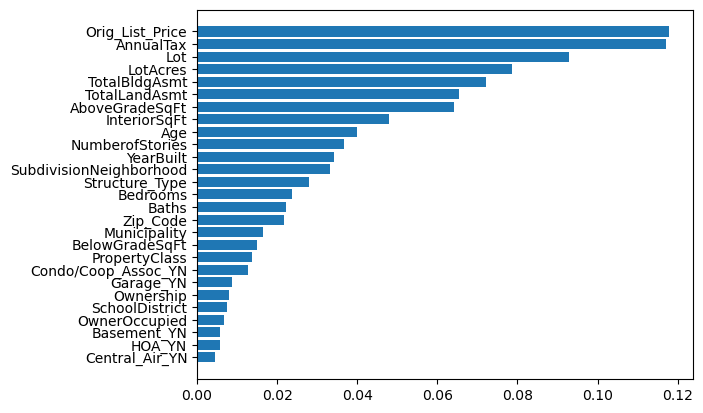

In [64]:
fig , ax = plt.subplots()
ax.barh(pf["features"] , pf["feature_importances"])
ax.invert_yaxis()

In [65]:
pf

,features,feature_importances
0,Orig_List_Price,0.117962
1,AnnualTax,0.116974
2,Lot,0.092922
3,LotAcres,0.078537
4,TotalBldgAsmt,0.072027
5,TotalLandAsmt,0.065507
6,AboveGradeSqFt,0.064143
7,InteriorSqFt,0.047899
8,Age,0.039848
9,NumberofStories,0.036619


In [67]:
# Drop columns from clean_df
updated_df = clean_df.drop(columns=["Central_Air_YN", "HOA_YN", "Basement_YN", "OwnerOccupied", "SchoolDistrict", "LotAcres", "YearBuilt", "Municipality", "Garage_YN", "Ownership", "Condo/Coop_Assoc_YN", "PropertyClass", "BelowGradeSqFt"])
updated_df

,Days_on_Market,Orig_List_Price,Zip_Code,AnnualTax,SubdivisionNeighborhood,Lot,TotalLandAsmt,TotalBldgAsmt,Bedrooms,Baths,AboveGradeSqFt,Age,Structure_Type,InteriorSqFt,NumberofStories
MLSNumber,,,,,,,,,,,,,,,
DENC518086,5.0,330000.0,15,2151,449,293,12600,52600,4.0,2.0,2099.0,1958.0,1,2099.0,27
DENC518982,47.0,215500.0,15,1824,388,825,9900,45400,3.0,2.0,1575.0,1976.0,4,1927.0,27
DENC512992,15.0,200000.0,15,1563,610,592,9400,38000,2.0,2.0,1150.0,1985.0,4,1150.0,27
DENC512104,11.0,219900.0,15,2174,185,606,8600,57300,2.0,3.0,1425.0,1985.0,4,1425.0,27
DENC503480,3.0,190000.0,15,1349,535,813,8600,32300,3.0,2.0,925.0,1957.0,1,925.0,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DENC520114,5.0,595000.0,1,4311,84,690,31300,99400,3.0,2.0,3045.0,1958.0,1,3045.0,11
DENC520392,25.0,639000.0,1,5208,0,751,25200,132700,4.0,4.0,3175.0,1973.0,1,3811.0,12
DENC2014038,7.0,529900.0,1,4407,476,488,30000,103600,4.0,3.0,2850.0,1989.0,1,3191.0,12


In [68]:
y = updated_df["Days_on_Market"]
X = updated_df.drop(columns="Days_on_Market")

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train.shape

(4041, 14)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=100)

In [72]:
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [73]:
y_pred = regr.predict(X)
print(y_pred.shape)

(5389,)


In [74]:
y_pred

array([14.22253897, 14.22253897, 14.22253897, ..., 16.5779907 ,
       25.59753172, 14.22253897])

In [75]:
regr.score(X_test,y_test)

0.1320265471991735

In [76]:
def feature_plot(columns, importance, n=10):
    df = (pd.DataFrame({"features" : columns,
                        "feature_importances" : importance}).sort_values("feature_importances",ascending=False).reset_index(drop=True))
    return df

In [77]:
pf = feature_plot(X_train.columns, regr.feature_importances_)

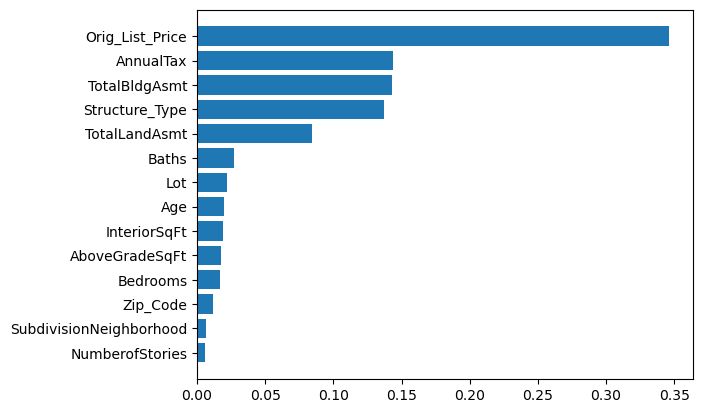

In [78]:
fig , ax = plt.subplots()
ax.barh(pf["features"] , pf["feature_importances"])
ax.invert_yaxis()

### Baysean Ridge

In [45]:
from sklearn import linear_model

In [46]:
reg = linear_model.BayesianRidge()

In [47]:
reg.fit(X_train,y_train)

BayesianRidge()

In [48]:
y_pred = reg.predict(X)
print(y_pred.shape)

(5389,)


In [49]:
y_pred

array([12.33767655,  8.49060787, 11.73572314, ..., 20.15928482,
       23.20977071, 17.40291511])

In [54]:
reg.score(X_test,y_test)

0.044819475475294746

In [55]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error ,r2_score
def show_score(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_test)
    scores={"Training MAE" : mean_absolute_error(y_train,train_pred),
            "Valid MAE" : mean_absolute_error(y_test, val_pred),
            "Training RMSLE": np.sqrt(mean_squared_log_error(y_train, train_pred)),
            "Valid RMSLE" :  np.sqrt(mean_squared_log_error(y_test,val_pred)),
            "Training R^2" : r2_score(y_train, train_pred),
            "Valid R^2" : r2_score(y_test,val_pred)
           }
    return scores